**Name: Christ-Brian Amedjonekou**  
**Date: 4/08/2019**  
**TCET 3102-E316 (Analog and Digital Communications) Lab 3**  
**Spring 2019, Section: E316, Code: 37251**  
**Instructor: Song Tang**

### Objective

* Design a low pass elliptic filter to receive desired output (filtered signal), where the input will be a square wave signal.

### Equipment 

* Computer Software

### Theory

* The subscriber loop is the most critical component of a telephone network. They're created through the use of two copper wires.


* We can created an equivalent circuit for the subscriber loop through the use of a low pass filter. The bandwidth of this filter can be calculated w/ the following formula: $$\space$$ $$\omega_c = \frac{1}{RC} = 0.707$$  $$\space$$ 


* $0.707$ is the maximum magnitude and the cuttoff frequency


* For telephone networks, the bandwidth of the of subscriber loop is enough to support signal transmissions of the range **0 - 4 kHZ**. Also, to further improve quality of transmissions, designers use loading coils to flatten attuentuation-frequency characters of the loop. This was how telephone networks used to function.


* A problem arises, however, with the arrival of the digital era. Since digital signals are pulse waveforms they have a spectrum much larger that the range mentioned above. The objective of our experiment is determine the reponse of digital signals through the subscriber loops.

### Modules (Packages)

In [1]:
# These are the packages I'll need to solve this problem
import math as ma
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import ellip, freqz, lfilter, freqs

### Variables for time domain plot

**The following function can also be used to generate a fourier series**

```python
def ffs_(omega, t, A):
    s = np.sin(omega*t)
    for i in range(3, 30, 2):
        s = s + 1/i * np.sin(i*omega*t)
    s = A/2 + (2*A)/np.pi * s
    return s
```

In [2]:
# These variables are used to create the fourier series
# Start and Stop indicates my domain for my sampling frequency [samplingfreq; (F_S)]
# 100 points.
# n1, n2 are the amount of harmonics I want.
start, stop, n, samplingfreq = 0, 100, 15, 100 

# 't' is for time, and is used to create my 100 Hz time vector
t = np.linspace(start, stop, 256) / samplingfreq

# 'A' represents the amplitude 2 volts
A = 2

# 'fundamental' is the DC component of the Fourier Series 
fundamental = A/2

# 'signalfreq' is the Signal Frequency (f_0)
signalfreq = 1 

# 'omega' is the Angular Velocity (w_0)
omega = 2 * np.pi * signalfreq

# Lambda function 
template = lambda p: ((2*A)/(np.pi*(2*p+1))) * np.sin((2*p+1) * omega * t)

# harmonics1, harmonics2 are AC component of the Fourier series
harmonics = sum([template(p) for p in range(n+1)])

# ffs1, ffs2 are the fourier series
ffs = lambda n: (fundamental + harmonics)

### RUN 1: Synthesis Square Wave

#### Step 1: This is using the square wave from Lab 1

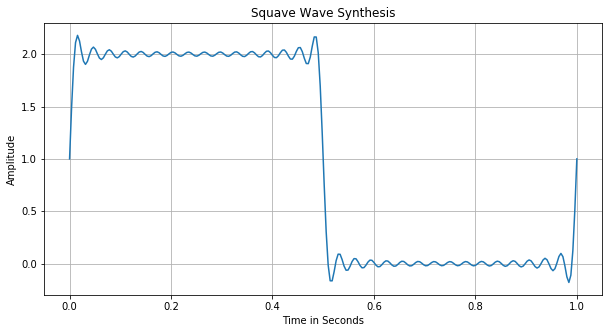

In [3]:
# Creates figure 1 and its subplot 
fig1, ax1 = plt.figure(figsize= (10,5)), plt.subplot()
ax1.plot(t, ffs(n))
ax1.set(xlabel= 'Time in Seconds', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax1.grid(True)

**The following code gives very similar results as the one shown above**

```python
# Creates figure 2 and its subplot
# This here uses a different fourier series function. 
# I wanted to see if results later down the lab would be different
fig2, ax2 = plt.figure(figsize= (10,5)), plt.subplot()
ax2.plot(t, ffs_(omega, t, A))
ax2.set(xlabel= 'Frequency (Hertz)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax2.grid(True)
```

### RUN 2: Elliptic (Cauer) Filter Design

#### Step 1: Plot the Elliptic (Cauer) Filter

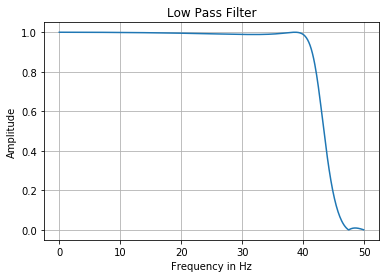

In [4]:
# Elliptical order, 'm'
m = 3

# Decibels of the ripple in passband, 'rP'
rP = 0.1

# Decibels of the ripple in stopband, 'rS'
rS = 40

# The Cutoff Filter Frequency, 'omega_N', normalized to Nyquist Frequency
# 'omega_N = 1' cooresponds to half the sampling frequency
# When the frequency equals to 'omega_N' the filter's magnitude response is
# equal to the ripple in passband, 'rP' (decibels)

omega_N = 0.8

# in-built scipy function for the Elliptic (Cauer) Filter 
b, a = ellip(m, rP, rS, omega_N)

# displays the magnitude and phase of the filter, normalized to Nyquist Frequency
omega_, H = freqz(b, a)
xval = (omega_ * samplingfreq)/(2 * np.pi)
yval = abs(H)
plt.plot(xval, yval)
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.title('Low Pass Filter')
plt.grid()

### RUN 3: Filter Input Signals

#### Step 1: Observe the filtering effect in the time domain

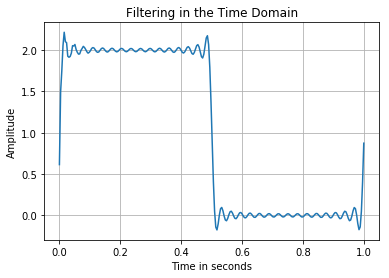

In [5]:
sf_ = lfilter(b, a, ffs(n))
plt.plot(t, sf_)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.title('Filtering in the Time Domain')
plt.grid()

**Also gives similar results as the one above**

```python
sf = lfilter(b, a, ffs_(omega, t, A))
plt.plot(t, sf)
```

#### Step 2: Observe the filtering effect in the frequency domain

**Also gives similar results as the one below**

```python
S = fft(ffs_(omega, t, A))[:256]/1000
SF = fft(sf)[:256]/1000
f = np.linspace(0,256, 256)
var1, var2 = abs(S), abs(SF)
plt.plot(f, var1)
plt.plot(f, var2)
plt.xlim(0,50)
plt.grid()
```

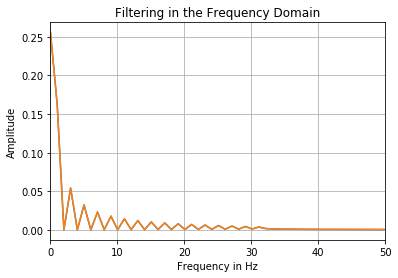

In [6]:
S = fft(ffs(n))[:256]/1000
SF = fft(sf_)[:256]/1000
f = np.linspace(0,256, 256)
var1, var2 = abs(S), abs(SF)
plt.plot(f, var1)
plt.plot(f, var2)
plt.xlim(0,50)
plt.xlabel('Frequency in Hz');
plt.ylabel('Amplitude')
plt.title('Filtering in the Frequency Domain')
plt.grid()

### Lab Questions/Requirements

#### Question 1: Follow Run 1 and synthesis a square wave with $A = 2 \space V$ and $T = 1 \space ms$**

* **Check RUN 1 for the answer, as it is already shown w/ the same initial conditions**

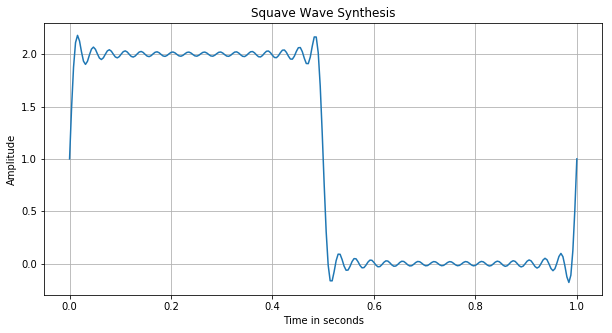

In [7]:
# Creates figure 1 and its subplot 
fig1, ax1 = plt.figure(figsize= (10,5)), plt.subplot()
ax1.plot(t, ffs(n))
ax1.set(xlabel= 'Time in seconds', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax1.grid(True)

#### Question 2: Follow RUN 2 and design a low pass filter w/ a bandwidth of 4 kHz. Depict the Magnitude-Frequency and Phase-Frequency charateristics

* **Check RUN 2 for the answer, as it is already shown w/ the same initial conditions**

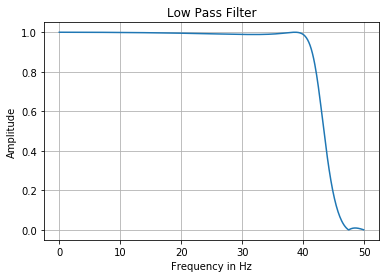

In [8]:
plt.plot(xval, yval)
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.title('Low Pass Filter')
plt.grid()

#### Question 3: Now pass the square wave through the lowpass filter and depict the time and frequency domain response

* **Check RUN 3 for the answer, as it is already shown w/ the same initial conditions**

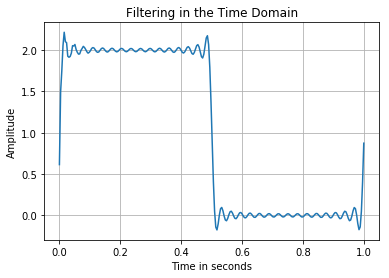

In [9]:
sf_ = lfilter(b, a, ffs(n))
plt.plot(t, sf_)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.title('Filtering in the Time Domain')
plt.grid()

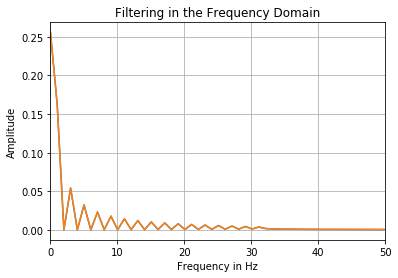

In [10]:
plt.plot(f, var1)
plt.plot(f, var2)
plt.xlim(0,50)
plt.xlabel('Frequency in Hz');
plt.ylabel('Amplitude')
plt.title('Filtering in the Frequency Domain')
plt.grid()

#### Question 4: Modify the filter design to pass only the first harmonic of the input square wave. Show results in the time and frequency domain

In [11]:
# These variables are used to create the fourier series
# Start and Stop indicates my domain for my sampling frequency [samplingfreq; (F_S)]
# 100 points.
# n1, n2 are the amount of harmonics I want.
start, stop, n, samplingfreq = 0, 100, 15, 100000 

# 't' is for time, and is used to create my 100 Hz time vector
t = np.linspace(start, stop, 256) / samplingfreq

# 'A' represents the amplitude 2 volts
A = 2

# 'fundamental' is the DC component of the Fourier Series 
fundamental = A/2

# 'signalfreq' is the Signal Frequency (f_0)
signalfreq = 1000 

# 'omega' is the Angular Velocity (w_0)
omega = 2 * np.pi * signalfreq

# Lambda function 
template = lambda p: ((2*A)/(np.pi*(2*p+1))) * np.sin((2*p+1) * omega * t)

# harmonics1, harmonics2 are AC component of the Fourier series
harmonics = sum([template(p) for p in range(n+1)])

# ffs1, ffs2 are the fourier series
ffs = lambda n: (fundamental + harmonics)

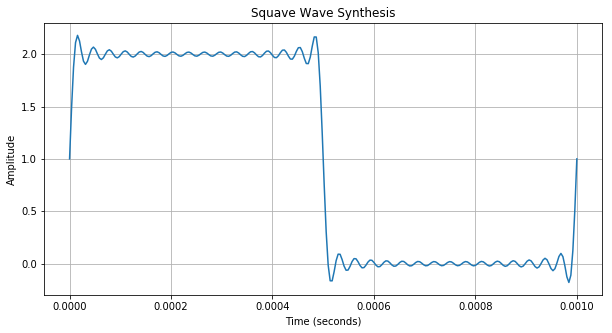

In [12]:
# Creates figure 1 and its subplot 
fig1, ax1 = plt.figure(figsize= (10,5)), plt.subplot()
ax1.plot(t, ffs(n))
ax1.set(xlabel= 'Time (seconds)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax1.grid(True)

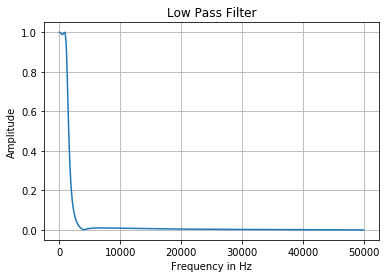

In [13]:
# Elliptical order, 'm'
m = 3

# Decibels of the ripple in passband, 'rP'
rP = 0.1

# Decibels of the ripple in stopband, 'rS'
rS = 40

# The Cutoff Filter Frequency, 'omega_N', normalized to Nyquist Frequency
# 'omega_N = 1' cooresponds to half the sampling frequency
# When the frequency equals to 'omega_N' the filter's magnitude response is
# equal to the ripple in passband, 'rP' (decibels)

omega_N = 0.02

# in-built scipy function for the Elliptic (Cauer) Filter 
b_, a_ = ellip(m, rP, rS, omega_N)

# displays the magnitude and phase of the filter, normalized to Nyquist Frequency
omega_, H = freqz(b_, a_)
xval = (omega_ * samplingfreq)/(2 * np.pi)
yval = abs(H)
plt.plot(xval, yval)
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.title('Low Pass Filter')
plt.grid()

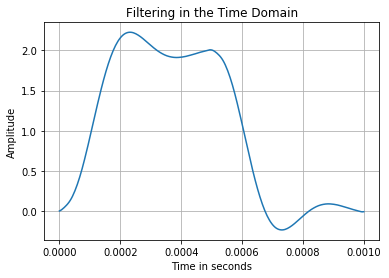

In [14]:
sf_ = lfilter(b_, a_, ffs(n))
plt.plot(t, sf_)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.title('Filtering in the Time Domain')
plt.grid()

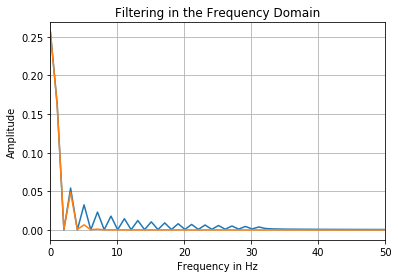

In [15]:
S = fft(ffs(n))[:256]/1000
SF = fft(sf_)[:256]/1000
f = np.linspace(0,256, 256)
var1, var2 = abs(S), abs(SF)
plt.plot(f, var1)
plt.plot(f, var2)
plt.xlim(0,50)
plt.xlabel('Frequency in Hz');
plt.ylabel('Amplitude')
plt.title('Filtering in the Frequency Domain')
plt.grid()

#### Question 5: Repeat the previous step to pass only the three first harmonics of the input square wave. Show results in the time and frequency domain. 

In [16]:
# These variables are used to create the fourier series
# Start and Stop indicates my domain for my sampling frequency [samplingfreq; (F_S)]
# 100 points.
# n1, n2 are the amount of harmonics I want.
start, stop, n, samplingfreq = 0, 100, 15, 100000 

# 't' is for time, and is used to create my 100 Hz time vector
t = np.linspace(start, stop, 256) / samplingfreq
# 'A' represents the amplitude 2 volts
A = 2
# 'fundamental' is the DC component of the Fourier Series 
fundamental = A/2
# 'signalfreq' is the Signal Frequency (f_0)
signalfreq = 1000 
# 'omega' is the Angular Velocity (w_0)
omega = 2 * np.pi * signalfreq
# Lambda function 
template = lambda p: ((2*A)/(np.pi*(2*p+1))) * np.sin((2*p+1) * omega * t)
# harmonics1, harmonics2 are AC component of the Fourier series
harmonics = sum([template(p) for p in range(n+1)])
# ffs1, ffs2 are the fourier series
ffs = lambda n: (fundamental + harmonics)

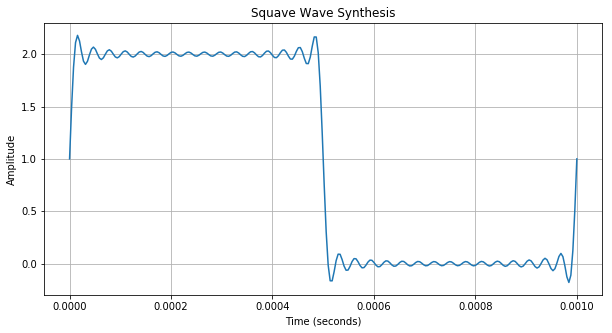

In [17]:
# Creates figure 1 and its subplot 
fig1, ax1 = plt.figure(figsize= (10,5)), plt.subplot()
ax1.plot(t, ffs(n))
ax1.set(xlabel= 'Time (seconds)', ylabel= 'Amplitude', 
        title= 'Squave Wave Synthesis');
ax1.grid(True)

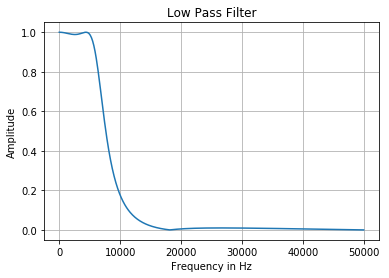

In [18]:
# Elliptical order, 'm'
m = 3
# Decibels of the ripple in passband, 'rP'
rP = 0.1
# Decibels of the ripple in stopband, 'rS'
rS = 40
# The Cutoff Filter Frequency, 'omega_N', normalized to Nyquist Frequency
# 'omega_N = 1' cooresponds to half the sampling frequency
# When the frequency equals to 'omega_N' the filter's magnitude response is
# equal to the ripple in passband, 'rP' (decibels)
omega_N = 0.1
# in-built scipy function for the Elliptic (Cauer) Filter 
b, a = ellip(m, rP, rS, omega_N)
# displays the magnitude and phase of the filter, normalized to Nyquist Frequency
omega_, H = freqz(b, a)
xval = (omega_ * samplingfreq)/(2 * np.pi)
yval = abs(H)
plt.plot(xval, yval)
plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.title('Low Pass Filter')
plt.grid()

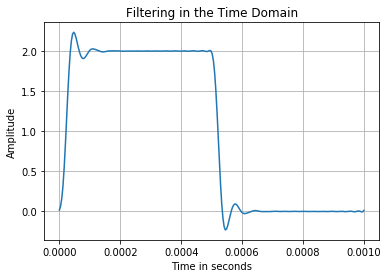

In [19]:
sf_ = lfilter(b, a, ffs(n))
plt.plot(t, sf_)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.title('Filtering in the Time Domain')
plt.grid()

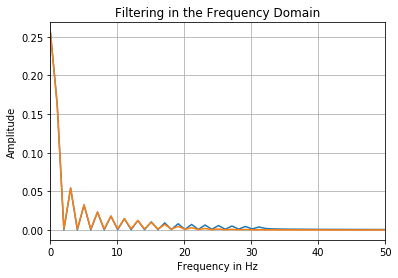

In [20]:
S = fft(ffs(n))[:256]/1000
SF = fft(sf_)[:256]/1000
f = np.linspace(0,256, 256)
var1, var2 = abs(S), abs(SF)
plt.plot(f, var1)
plt.plot(f, var2)
plt.xlim(0,50)
plt.xlabel('Frequency in Hz');
plt.ylabel('Amplitude')
plt.title('Filtering in the Frequency Domain')
plt.grid()

#### Question 6: If you design an R-C Circuit ($R = 10 \space k\Omega$ and $C = 1 \space pF$) with a resistor in series and a capacitor in parallel with output terminals, what would be the filter bandwidth and why it would work as a low pass filter.  

* This would work as an frequencies higher than 16 MHz would get attenuated

In [21]:
cuttoff = lambda R, C: 1/(2*np.pi*R*C)
print('Cuttoff Frequency (Bandwidth): ',cuttoff(10*ma.pow(10,3), 1*ma.pow(10, -12))/ma.pow(10,6), 'MHz')

Cuttoff Frequency (Bandwidth):  15.915494309189533 MHz


### Analysis/Conclusion

**I was somewhat successful with this lab. We determined that an increase/decrease in the sampling frequency and fundamental frequency by a factor of 1000 will not change properties of the filter. The scaling will be the only thing magnified. Changing the filter cutoff frequency to pass the first harmonic causes us to have a sine wave time domain like response. Basically the filtered signal looks almost like a sine wave. When we change the filter cutoff frequency to pass three harmonics, we have more ripples, according to our graphs. The first harmonic tends to roll off faster than when passing the third harmonics.**